In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = '../Datasets/MachineLearningCVE/'

print("Loading Monday file...")
monday = pd.read_csv(DATA_PATH + 'Monday-WorkingHours.pcap_ISCX.csv', low_memory=False)
monday.columns = monday.columns.str.strip()

print(f"✅ Shape: {monday.shape}")
print(f"✅ Label values: {monday['Label'].unique()}")
print(f"✅ First 5 columns: {list(monday.columns[:5])}")
print(f"✅ Memory: {monday.memory_usage(deep=True).sum() / 1e6:.1f} MB")


ModuleNotFoundError: No module named 'pandas'

In [1]:
import sys
print(sys.executable)



/opt/homebrew/Caskroom/mambaforge/base/envs/iot-ids/bin/python


In [2]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn joblib scipy tqdm


100.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.1 MB/s  0:00:00 25.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 17.4 MB/s  0:00:00 14.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.8 MB/s  0:00:007.3 MB/s eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 21.4 MB/s  0:00:00 23.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 15.3 MB/s  0:00:01 eta 0:00:010:01:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

print(f"✅ pandas: {pd.__version__}")
print(f"✅ numpy: {np.__version__}")
print(f"✅ sklearn: {sklearn.__version__}")
print(f"✅ xgboost: {xgboost.__version__}")
print("\n🎉 All packages working! Ready to load data.")


✅ pandas: 2.3.3
✅ numpy: 2.2.6
✅ sklearn: 1.7.2
✅ xgboost: 3.2.0

🎉 All packages working! Ready to load data.


In [4]:
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = '../Datasets/MachineLearningCVE/'

print("Loading Monday file...")
monday = pd.read_csv(DATA_PATH + 'Monday-WorkingHours.pcap_ISCX.csv', low_memory=False)
monday.columns = monday.columns.str.strip()

print(f"✅ Shape: {monday.shape}")
print(f"✅ Labels: {monday['Label'].unique()}")
print(f"✅ Columns (first 5): {list(monday.columns[:5])}")


Loading Monday file...
✅ Shape: (529918, 79)
✅ Labels: ['BENIGN']
✅ Columns (first 5): ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets']


In [5]:
import os

files = {
    'Monday':        'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday':       'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday':     'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday_Web':  'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday_Inf':  'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday_Morn':   'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday_DDoS':   'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday_Port':   'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
}

dfs = []
for day, filename in files.items():
    filepath = DATA_PATH + filename
    print(f"Loading {day}...", end=' ')
    df_temp = pd.read_csv(filepath, low_memory=False)
    df_temp.columns = df_temp.columns.str.strip()
    df_temp['day'] = day
    dfs.append(df_temp)
    print(f"✅ {df_temp.shape[0]:,} rows")

df = pd.concat(dfs, ignore_index=True)
print(f"\n🎉 Full dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB")



Loading Monday... ✅ 529,918 rows
Loading Tuesday... ✅ 445,909 rows
Loading Wednesday... ✅ 692,703 rows
Loading Thursday_Web... ✅ 170,366 rows
Loading Thursday_Inf... ✅ 288,602 rows
Loading Friday_Morn... ✅ 191,033 rows
Loading Friday_DDoS... ✅ 225,745 rows
Loading Friday_Port... ✅ 286,467 rows

🎉 Full dataset: 2,830,743 rows × 80 columns
Memory: 2.13 GB


ATTACK TYPE DISTRIBUTION
Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11

Total unique labels: 15


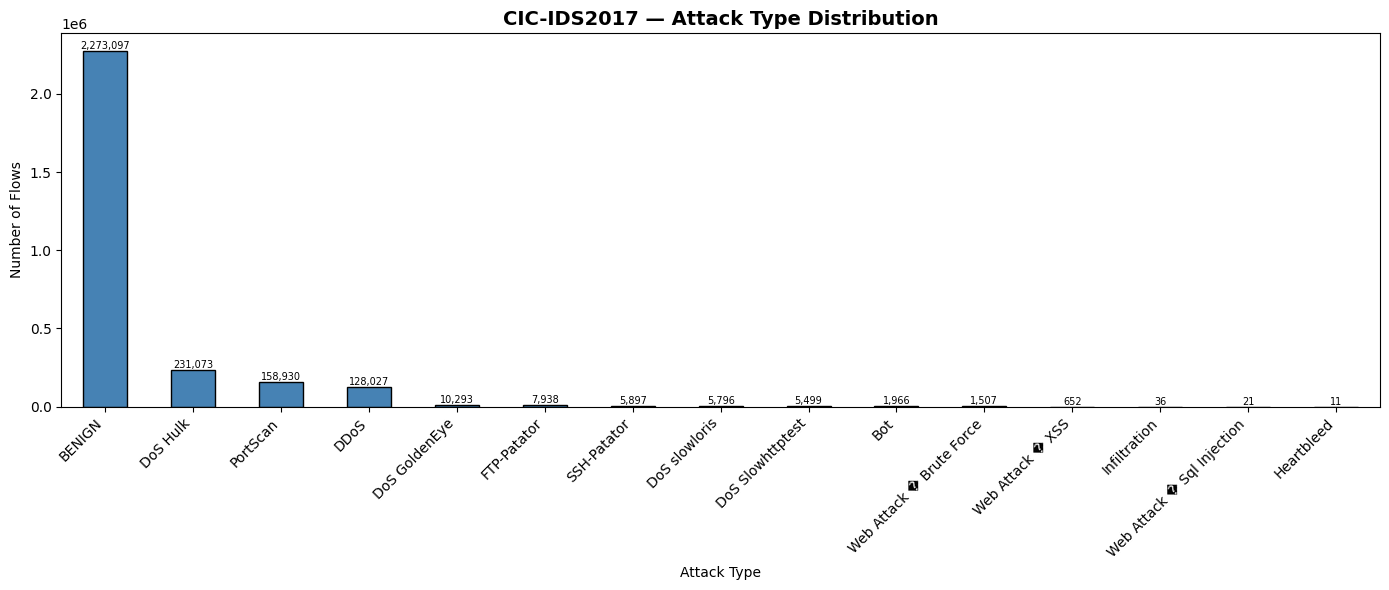

In [6]:
print("="*55)
print("ATTACK TYPE DISTRIBUTION")
print("="*55)
print(df['Label'].value_counts().to_string())
print(f"\nTotal unique labels: {df['Label'].nunique()}")

# Visualize
plt.figure(figsize=(14, 6))
ax = df['Label'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('CIC-IDS2017 — Attack Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type')
plt.ylabel('Number of Flows')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=7)
plt.tight_layout()
plt.savefig('../results/01_attack_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


In [7]:
print("="*55)
print("DATA QUALITY REPORT")
print("="*55)

# Missing values
missing = df.isnull().sum()
print(f"Columns with missing values: {(missing > 0).sum()}")
print(missing[missing > 0])

# Infinite values
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(df[numeric_cols]).sum().sum()
print(f"\nInfinite values: {inf_count:,}")

# Duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count:,}")

# Class balance
normal = (df['Label'] == 'BENIGN').sum()
attack = (df['Label'] != 'BENIGN').sum()
total = len(df)
print(f"\nNormal (BENIGN): {normal:,} ({normal/total*100:.1f}%)")
print(f"Attack traffic:  {attack:,} ({attack/total*100:.1f}%)")
print(f"Imbalance ratio: {normal/attack:.1f}:1")


DATA QUALITY REPORT
Columns with missing values: 1
Flow Bytes/s    1358
dtype: int64

Infinite values: 4,376
Duplicate rows: 256,479

Normal (BENIGN): 2,273,097 (80.3%)
Attack traffic:  557,646 (19.7%)
Imbalance ratio: 4.1:1


In [8]:
# Fix infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Binary label (BENIGN=0, Attack=1)
df['binary_label'] = (df['Label'] != 'BENIGN').astype(int)

print(f"✅ Infinite values fixed")
print(f"✅ NaN values filled")
print(f"✅ Binary label added")
print(f"\nBinary label distribution:")
print(df['binary_label'].value_counts())
print(f"\nDataset ready for modelling!")



✅ Infinite values fixed
✅ NaN values filled
✅ Binary label added

Binary label distribution:
binary_label
0    2273097
1     557646
Name: count, dtype: int64

Dataset ready for modelling!


In [9]:
print("Saving processed datasets...")

df.to_pickle('../results/full_dataset.pkl')
print(f"✅ Full dataset saved: {df.shape}")

from sklearn.utils import resample

df_sample = df.groupby('Label', group_keys=False).apply(
    lambda x: x.sample(min(len(x), int(500000 * len(x)/len(df))), random_state=42)
)
df_sample.to_pickle('../results/sample_dataset.pkl')
print(f"✅ Sample dataset saved: {df_sample.shape}")
print(f"\nSample distribution:")
print(df_sample['Label'].value_counts())


Saving processed datasets...
✅ Full dataset saved: (2830743, 81)
✅ Sample dataset saved: (499993, 81)

Sample distribution:
Label
BENIGN                        401501
DoS Hulk                       40814
PortScan                       28072
DDoS                           22613
DoS GoldenEye                   1818
FTP-Patator                     1402
SSH-Patator                     1041
DoS slowloris                   1023
DoS Slowhttptest                 971
Bot                              347
Web Attack � Brute Force         266
Web Attack � XSS                 115
Infiltration                       6
Web Attack � Sql Injection         3
Heartbleed                         1
Name: count, dtype: int64


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import time
import joblib

drop_cols = ['Label', 'binary_label', 'day']
X = df_sample.drop(drop_cols, axis=1)
y = df_sample['binary_label']

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]:,}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")

print("\n🚀 Training Random Forest (this takes 3-5 min)...")
start = time.time()
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = rf.predict(X_test)
inference_time = (time.time() - start) / len(X_test) * 1000

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{'='*50}")
print(f"RANDOM FOREST RESULTS")
print(f"{'='*50}")
print(f"Accuracy:       {acc*100:.2f}%")
print(f"F1-Score:       {f1:.4f}")
print(f"Train time:     {train_time:.1f}s")
print(f"Inference:      {inference_time:.4f} ms/sample")
print(f"\n{classification_report(y_test, y_pred, target_names=['BENIGN','ATTACK'])}")

joblib.dump(rf, '../models/rf_baseline.pkl')
print("✅ Model saved!")


Features: 78
Samples: 499,993
Train: 399,994 | Test: 99,999

🚀 Training Random Forest (this takes 3-5 min)...

RANDOM FOREST RESULTS
Accuracy:       99.87%
F1-Score:       0.9987
Train time:     14.2s
Inference:      0.0021 ms/sample

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     80301
      ATTACK       1.00      1.00      1.00     19698

    accuracy                           1.00     99999
   macro avg       1.00      1.00      1.00     99999
weighted avg       1.00      1.00      1.00     99999

✅ Model saved!


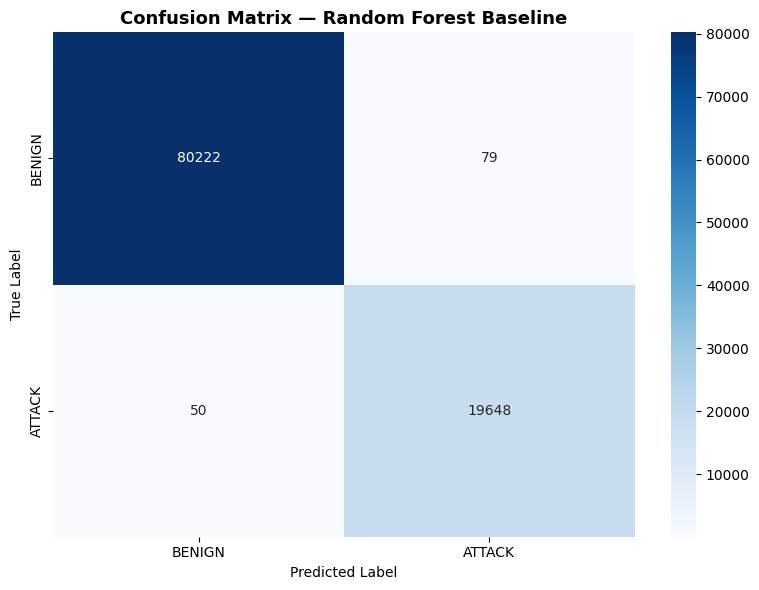

Detection Rate (TPR): 99.75%
False Positive Rate:  0.10%
Target FPR <3%: ✅ Achieved!


In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['BENIGN', 'ATTACK'],
            yticklabels=['BENIGN', 'ATTACK'])
plt.title('Confusion Matrix — Random Forest Baseline', fontsize=13, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../results/02_confusion_matrix_rf.png', dpi=150, bbox_inches='tight')
plt.show()

tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
print(f"Detection Rate (TPR): {tpr*100:.2f}%")
print(f"False Positive Rate:  {fpr*100:.2f}%")
print(f"Target FPR <3%: {'✅ Achieved!' if fpr < 0.03 else '⚠️ Needs tuning'}")


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_multi = le.fit_transform(df_sample['Label'])

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print("🚀 Training Multi-class RF...")
start = time.time()
rf_multi = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_multi.fit(X_train_m, y_train_m)
train_time = time.time() - start

y_pred_m = rf_multi.predict(X_test_m)
acc_m = accuracy_score(y_test_m, y_pred_m)

print(f"Multi-class Accuracy: {acc_m*100:.2f}%")
print(f"Train time: {train_time:.1f}s")
print(f"\n{classification_report(y_test_m, y_pred_m, target_names=le.classes_)}")

joblib.dump(rf_multi, '../models/rf_multiclass.pkl')
joblib.dump(le, '../models/label_encoder.pkl')
print("✅ Saved!")


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Check class counts in sample
print("Class counts in sample:")
print(df_sample['Label'].value_counts())

# Remove classes with fewer than 10 samples
min_samples = 10
class_counts = df_sample['Label'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df_multi = df_sample[df_sample['Label'].isin(valid_classes)].copy()

print(f"\nRemoved classes with <{min_samples} samples")
print(f"Remaining classes: {df_multi['Label'].nunique()}")
print(f"Remaining samples: {df_multi.shape[0]:,}")

# Encode labels
le = LabelEncoder()
y_multi = le.fit_transform(df_multi['Label'])

# Features
drop_cols = ['Label', 'binary_label', 'day']
X_multi = df_multi.drop(drop_cols, axis=1)

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print(f"\nTrain: {X_train_m.shape[0]:,} | Test: {X_test_m.shape[0]:,}")

# Train
print("\n🚀 Training Multi-class RF...")
start = time.time()
rf_multi = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_multi.fit(X_train_m, y_train_m)
train_time = time.time() - start

y_pred_m = rf_multi.predict(X_test_m)
acc_m = accuracy_score(y_test_m, y_pred_m)

print(f"\n{'='*50}")
print(f"MULTI-CLASS RF RESULTS")
print(f"{'='*50}")
print(f"Accuracy:   {acc_m*100:.2f}%")
print(f"Train time: {train_time:.1f}s")
print(f"\n{classification_report(y_test_m, y_pred_m, target_names=le.classes_)}")

joblib.dump(rf_multi, '../models/rf_multiclass.pkl')
joblib.dump(le, '../models/label_encoder.pkl')
print("✅ Multi-class model saved!")



Class counts in sample:
Label
BENIGN                        401501
DoS Hulk                       40814
PortScan                       28072
DDoS                           22613
DoS GoldenEye                   1818
FTP-Patator                     1402
SSH-Patator                     1041
DoS slowloris                   1023
DoS Slowhttptest                 971
Bot                              347
Web Attack � Brute Force         266
Web Attack � XSS                 115
Infiltration                       6
Web Attack � Sql Injection         3
Heartbleed                         1
Name: count, dtype: int64

Removed classes with <10 samples
Remaining classes: 12
Remaining samples: 499,983

Train: 399,986 | Test: 99,997

🚀 Training Multi-class RF...

MULTI-CLASS RF RESULTS
Accuracy:   99.72%
Train time: 11.8s

                          precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00     80301
                     Bot       0.34      0.90     